In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import adjustText
from adjustText import adjust_text

In [2]:
path = '/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/summary_stats/alzheimers/ADSP_reference_panel/fine_mapping/annotations_dl/aggregate_finemap/remove_index0/'
susie = pd.read_csv(path+ 'susie_snp.tsv', sep = '\t')
mutual = pd.read_csv(path + 'mutual_snp.tsv', sep = '\t')

In [3]:
susie['source']  = 'susie specific'
mutual['source'] = 'mutual'
all_snp = susie.append( mutual)

In [4]:
all_snp

,SNP,CHR,BP,A1,A2,MAF,N,Z,P,PIP,BETA_MEAN,BETA_SD,CREDIBLE_SET,cumulative_pos,source
0,rs12037841,1,207510847,T,G,0.1888,283145,-11.86540,1.790780e-32,0.201620,-0.005907,0.011854,chr1:206000001-209000001:3,207510847,susie specific
1,rs1752684,1,207573951,A,G,0.1923,283145,-11.60190,4.028330e-31,0.024769,-0.000718,0.004553,chr1:206000001-209000001:3,207573951,susie specific
2,rs10863417,1,207623552,A,T,0.1898,283145,-11.64080,2.556770e-31,0.022745,-0.000651,0.004281,chr1:206000001-209000001:3,207623552,susie specific
3,rs10863418,1,207624893,C,G,0.1965,283145,-11.65690,2.117000e-31,0.014597,-0.000411,0.003387,chr1:206000001-209000001:3,207624893,susie specific
4,rs4844610,1,207629207,A,C,0.1859,283145,-11.90380,1.130160e-32,0.382038,-0.011268,0.014432,chr1:206000001-209000001:3,207629207,susie specific
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,rs12482978,21,25875743,G,A,0.4745,283145,-4.61728,3.887950e-06,0.020812,-0.000200,0.001405,chr21:24000001-27000001:1,2130165966,mutual
1072,rs8127927,21,25878486,A,C,0.4747,283145,-4.52439,6.056990e-06,0.014228,-0.000135,0.001146,chr21:24000001-27000001:1,2130168709,mutual
1073,rs1876062,21,25884151,C,T,0.4764,283145,-4.47561,7.619350e-06,0.013432,-0.000127,0.001111,chr21:24000001-27000001:1,2130174374,mutual
1074,rs2829969,21,25885054,C,T,0.4763,283145,-4.50000,6.795350e-06,0.015743,-0.000150,0.001210,chr21:24000001-27000001:1,2130175277,mutual


Text(0.5, 1.0, 'susie specific SNPs')

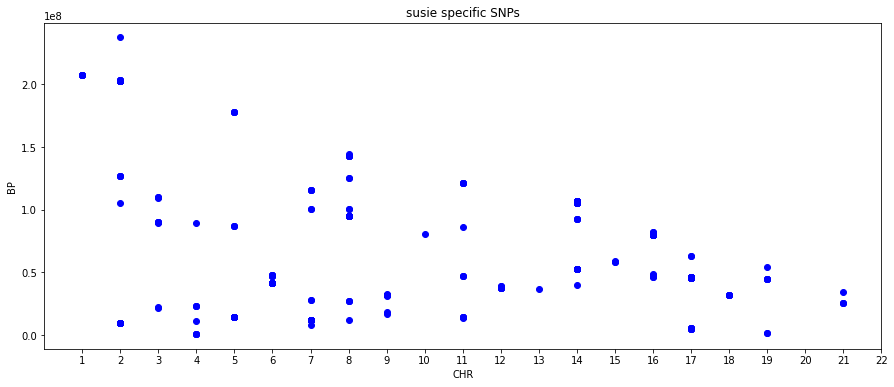

In [15]:
plt.figure(figsize=(15,6))
plt.scatter(susie.CHR, susie.BP, color = 'blue')
plt.xlabel('CHR')
plt.xticks(range(1,23))
plt.ylabel('BP')
plt.title('susie specific SNPs')

Text(0.5, 1.0, 'mutual SNPs')

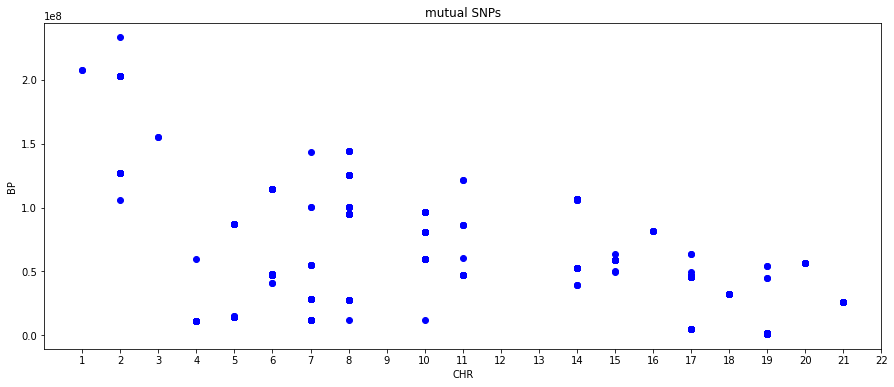

In [16]:
plt.figure(figsize=(15,6))
plt.scatter(mutual.CHR, mutual.BP, color = 'blue')
plt.xlabel('CHR')
plt.xticks(range(1,23))
plt.ylabel('BP')
plt.title('mutual SNPs')

In [9]:
all_snp[all_snp.SNP=='rs148764066']

,SNP,CHR,BP,A1,A2,MAF,N,Z,P,PIP,BETA_MEAN,BETA_SD,CREDIBLE_SET,cumulative_pos,source
182,rs148764066,8,142943835,G,A,0.0006,252054,2.88875,0.003868,1.0,7.707427,0.041131,chr8:141000001-144000001:4,1318011422,susie specific


<AxesSubplot:xlabel='CHR', ylabel='BP'>

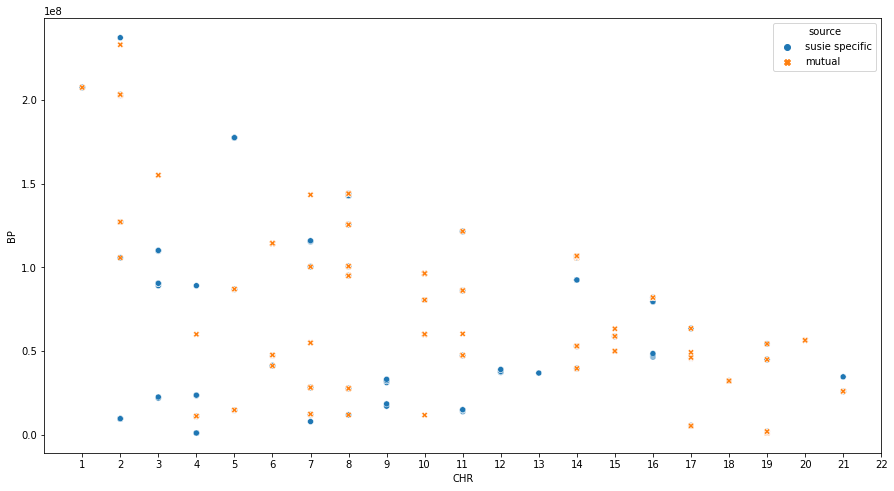

In [5]:
plt.figure(figsize=(15,8))
# plt.scatter(all_snp.CHR, all_snp.BP, c = all_snp.source)
# plt.xlabel('CHR')
# plt.xticks(range(1,23))
# plt.ylabel('BP')
# plt.title('susie specific SNPs')

plot = sns.scatterplot(data=all_snp, x= 'CHR', y = 'BP', hue='source', style = 'source')
plot.set_xticks(range(1,23))
plot

In [58]:
susie[susie.CHR == 12]

,SNP,CHR,BP,A1,A2,MAF,N,Z,P,PIP,BETA_MEAN,BETA_SD,CREDIBLE_SET,cumulative_pos,source
209,rs1164723179,12,37271528,G,A,0.0024,83972,2.940650,0.003275,0.890017,0.386084,0.137106,chr12:36000001-39000001:5,1607441528,susie specific
210,rs1203668302,12,37313969,C,T,0.0005,42083,2.194490,0.028200,0.080479,0.075999,0.257208,chr12:36000001-39000001:5,1607483969,susie specific
211,rs1284335013,12,37324536,G,A,0.0014,55361,-4.405260,0.000011,1.000000,-1.015215,0.026970,chr12:36000001-39000001:1,1607494536,susie specific
212,rs797031141,12,37419293,G,A,0.0007,42083,2.499580,0.012434,0.999997,1.088998,0.038173,chr12:36000001-39000001:2,1607589293,susie specific
213,rs1162070400,12,37449448,C,T,0.0007,42083,-2.439430,0.014710,1.000000,-2.250775,0.038128,chr12:36000001-39000001:3,1607619448,susie specific
214,rs980911191,12,37778067,C,T,0.0003,42083,1.592350,0.111305,0.100496,0.273791,0.819326,chr12:36000001-39000001:4,1607948067,susie specific
215,rs566116159,12,38853073,A,C,0.0027,279337,0.066002,0.947376,0.391374,-0.067445,0.084982,chr12:37000001-40000001:5,1609023073,susie specific
216,rs571147735,12,38940918,A,G,0.0028,279337,0.113184,0.909885,0.576376,-0.098022,0.085277,chr12:37000001-40000001:5,1609110918,susie specific


In [7]:
susie[susie.CHR == 9]

,SNP,CHR,BP,A1,A2,MAF,N,Z,P,PIP,BETA_MEAN,BETA_SD,CREDIBLE_SET,cumulative_pos,source
186,rs145906938,9,17009612,G,A,0.0014,252054,4.46880,7.866020e-06,1.000000,0.239417,0.026961,chr9:16000001-19000001:1,1336176518,susie specific
187,rs191741683,9,18380610,C,G,0.0011,252054,-2.20441,2.749550e-02,0.447166,-0.096582,0.109317,chr9:17000001-20000001:2,1337547516,susie specific
188,rs1019273395,9,31155419,A,G,0.0003,42083,-1.70365,8.844590e-02,1.000000,-3.648719,0.057881,chr9:30000001-33000001:4,1350322325,susie specific
189,rs141358472,9,32101149,C,G,0.0010,233257,-2.63559,8.399040e-03,0.999988,-1.214065,0.031936,chr9:31000001-34000001:1,1351268055,susie specific
190,rs145015868,9,32225677,C,G,0.0018,252054,4.32616,1.517310e-05,0.116118,0.139076,0.383792,chr9:31000001-34000001:5,1351392583,susie specific
191,rs533106610,9,32226910,G,A,0.0007,252054,4.22537,2.385440e-05,1.000000,2.920798,0.037840,chr9:31000001-34000001:3,1351393816,susie specific
192,rs7030974,9,32230624,C,A,0.0013,252054,5.09167,3.549210e-07,0.883882,1.246366,0.452505,chr9:31000001-34000001:5,1351397530,susie specific
193,rs868591373,9,33087898,A,G,0.0017,51710,-2.72327,6.463850e-03,1.000000,-0.693743,0.024048,chr9:32000001-35000001:4,1352254804,susie specific


In [60]:
median = susie[susie.CHR == 12].BP.median()
print(median)
susie[susie.CHR == 12].BP - median

37434370.5


209    -162842.5
210    -120401.5
211    -109834.5
212     -15077.5
213      15077.5
214     343696.5
215    1418702.5
216    1506547.5
Name: BP, dtype: float64

In [63]:

mean = susie[susie.CHR == 12].BP.mean()
print(mean)
susie[susie.CHR == 12].BP - mean

37793854.0


209    -522326.0
210    -479885.0
211    -469318.0
212    -374561.0
213    -344406.0
214     -15787.0
215    1059219.0
216    1147064.0
Name: BP, dtype: float64

In [73]:
## seperate them into two groups
subset1 =  susie[(susie.CHR == 12) & (susie.BP < 38000000)]
median = subset1.BP.median()
print(median)
subset1.BP - median


37371914.5


In [72]:
mean = subset1.BP.mean()
subset1.BP - mean

209   -154612.166667
210   -112171.166667
211   -101604.166667
212     -6847.166667
213     23307.833333
214    351926.833333
Name: BP, dtype: float64